<a href="https://colab.research.google.com/github/Mabinogit/AI-Image-Classification/blob/main/Orthogonality_and_Orthogonal_Complement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

That's an excellent combination — applying *analytical geometry* concepts like **orthogonality** and **orthogonal complements** to a **real-world energy industry** problem.

Here’s a project idea that’s both mathematically rich and grounded in the energy domain:

---

### 🔋 **Project Title: Optimal Sensor Placement for Energy Grid Monitoring Using Orthogonality and Gram-Schmidt**

---

### 🧠 **Objective:**

Use orthogonality and the Gram-Schmidt process to **select or generate orthogonal basis vectors** that represent **distinct, non-overlapping measurements** from multiple sensors in an energy grid, such as power consumption, voltage, and frequency — to ensure **maximum information gain and minimal redundancy**.

---

### 📌 **Problem Context (Energy Industry):**

Energy grids are monitored using sensors that collect data on different parameters (e.g., voltage, current, temperature). However, sensor data can be **redundant or highly correlated**, which wastes resources and increases storage/processing costs.

**Goal:** Given a set of correlated sensor vectors, transform them into an **orthogonal basis** to:

* Reduce redundancy
* Optimize placement of sensors or features to monitor
* Improve machine learning model performance (feature decorrelation)

---

### 🧮 **Mathematical Concepts to Apply:**

1. **Orthogonality**: Ensure that the selected sensor vectors are orthogonal (uncorrelated).
2. **Gram-Schmidt Process**: Convert a set of sensor signal vectors into an orthogonal set.
3. **Orthogonal Complement**: Find vectors that lie in the orthogonal complement of a subspace of known noise (or less useful data) to extract more informative components.
4. **Projections**: Project data onto subspaces to isolate important dimensions.

---

### 💡 **Steps to Build the Project:**

1. **Simulate or collect energy sensor data**:

   * Use public datasets (e.g., smart grid, solar inverter, wind turbine sensors).
   * Or simulate sensor signals for voltage, current, and temperature at multiple grid points.

2. **Represent sensor signals as vectors**:

   * Each sensor’s signal across time or features (like location) is treated as a vector in ℝⁿ.

3. **Apply Gram-Schmidt process**:

   * Orthonormalize the sensor data vectors.
   * Visualize the original vs. orthonormalized data.

4. **Determine redundancy**:

   * Check dot products between vectors to measure similarity.
   * Show which sensors provide overlapping vs. unique information.

5. **Use orthogonal complement to filter noise**:

   * Define a subspace for noise (e.g., unstable or low-information sensors).
   * Project data onto the orthogonal complement to enhance signal quality.

6. **(Optional AI Component)**:

   * Feed orthogonalized features into an ML model to predict energy consumption or detect faults.
   * Compare performance against raw (non-orthogonal) features.

---

### 📊 **Deliverables:**

* Visualizations of vector relationships (before and after Gram-Schmidt)
* Python code using NumPy for vector ops and projections
* A report explaining:

  * How orthogonality improved the sensor data
  * How the orthogonal complement was used
  * The benefit in an energy monitoring or optimization task

---

### 📚 Suggested Datasets:

* [UCI Smart Grid Stability](https://archive.ics.uci.edu/ml/datasets/Smart+Grid+Stability+Dataset)
* [Solar power data](https://www.nrel.gov/grid/solar-power-data.html)
* [Open Power System Data](https://open-power-system-data.org/)

---

Would you like help setting up the project structure or getting started with coding the Gram-Schmidt process and projecting vectors?


# Pre process data

In [8]:
import pandas as pd

In [9]:
dataset = pd.read_csv('/content/Sep_2022.csv')

In [13]:
dataset.tail()

,Timestamp,Battery_Active_Power,Battery_Active_Power_Set_Response,PVPCS_Active_Power,GE_Body_Active_Power,GE_Active_Power,GE_Body_Active_Power_Set_Response,FC_Active_Power_FC_END_Set,FC_Active_Power,FC_Active_Power_FC_end_Set_Response,Island_mode_MCCB_Active_Power,MG-LV-MSB_AC_Voltage,Receiving_Point_AC_Voltage,Island_mode_MCCB_AC_Voltage,Island_mode_MCCB_Frequency,MG-LV-MSB_Frequency,Inlet_Temperature_of_Chilled_Water,Outlet_Temperature
258979,2022/09/30 23:23:11,-0.1,0.0,0.0,0.0,-0.7,130.0,40.0,37.0,40.0,-23.0,483.0,483.0,483.0,60.049999,60.049999,20.299999,17.700001
258980,2022/09/30 23:23:21,-0.4,0.0,0.0,0.0,-1.7,130.0,40.0,37.0,40.0,-23.0,483.0,483.0,483.0,60.040001,60.049999,20.299999,17.700001
258981,2022/09/30 23:23:31,-0.1,0.0,0.0,0.0,-0.7,130.0,40.0,37.0,40.0,-23.0,483.0,483.0,483.0,60.049999,60.049999,20.299999,17.799999
258982,2022/09/30 23:23:41,-0.2,0.0,0.0,0.0,-1.0,130.0,40.0,37.0,40.0,-23.0,483.0,483.0,483.0,60.049999,60.049999,20.299999,17.700001
258983,2022/09/30 23:23:51,-0.3,0.0,0.0,0.0,-1.7,130.0,40.0,37.0,40.0,-22.0,483.0,483.0,483.0,60.040001,60.040001,20.299999,17.700001


In [15]:
dataset.columns

Index(['Timestamp', 'Battery_Active_Power',
       'Battery_Active_Power_Set_Response', 'PVPCS_Active_Power',
       'GE_Body_Active_Power', 'GE_Active_Power',
       'GE_Body_Active_Power_Set_Response', 'FC_Active_Power_FC_END_Set',
       'FC_Active_Power', 'FC_Active_Power_FC_end_Set_Response',
       'Island_mode_MCCB_Active_Power', 'MG-LV-MSB_AC_Voltage',
       'Receiving_Point_AC_Voltage', 'Island_mode_MCCB_AC_Voltage',
       'Island_mode_MCCB_Frequency', 'MG-LV-MSB_Frequency',
       'Inlet_Temperature_of_Chilled_Water', 'Outlet_Temperature'],
      dtype='object')

Power

In [22]:
powerdataset = dataset.drop( ['MG-LV-MSB_AC_Voltage',
       'Receiving_Point_AC_Voltage', 'Island_mode_MCCB_AC_Voltage',
       'Island_mode_MCCB_Frequency', 'MG-LV-MSB_Frequency',
       'Inlet_Temperature_of_Chilled_Water', 'Outlet_Temperature', 'Timestamp'] , axis = 1)

voltagedataset = dataset.drop(['Battery_Active_Power',
       'Battery_Active_Power_Set_Response', 'PVPCS_Active_Power',
       'GE_Body_Active_Power', 'GE_Active_Power',
       'GE_Body_Active_Power_Set_Response', 'FC_Active_Power_FC_END_Set',
       'FC_Active_Power', 'FC_Active_Power_FC_end_Set_Response',
       'Island_mode_MCCB_Active_Power', 'Island_mode_MCCB_Frequency', 'MG-LV-MSB_Frequency',
       'Inlet_Temperature_of_Chilled_Water', 'Outlet_Temperature', 'Timestamp'], axis = 1)

frequencydataset = dataset.drop(['Battery_Active_Power',
       'Battery_Active_Power_Set_Response', 'PVPCS_Active_Power',
       'GE_Body_Active_Power', 'GE_Active_Power',
       'GE_Body_Active_Power_Set_Response', 'FC_Active_Power_FC_END_Set',
       'FC_Active_Power', 'FC_Active_Power_FC_end_Set_Response',
       'Island_mode_MCCB_Active_Power', 'MG-LV-MSB_AC_Voltage',
       'Receiving_Point_AC_Voltage', 'Island_mode_MCCB_AC_Voltage',   'Inlet_Temperature_of_Chilled_Water', 'Outlet_Temperature', 'Timestamp'], axis = 1)

In [26]:
powerdataset.head()

,Battery_Active_Power,Battery_Active_Power_Set_Response,PVPCS_Active_Power,GE_Body_Active_Power,GE_Active_Power,GE_Body_Active_Power_Set_Response,FC_Active_Power_FC_END_Set,FC_Active_Power,FC_Active_Power_FC_end_Set_Response,Island_mode_MCCB_Active_Power
0,0.0,0.0,-1.0,0.0,-1.0,181.0,0.0,-1.0,0.0,10.0
1,0.0,0.0,-1.0,0.0,-1.0,181.0,0.0,-1.0,0.0,10.0
2,0.0,0.0,-1.0,0.0,-1.0,181.0,0.0,-1.0,0.0,10.0
3,0.0,0.0,-1.0,0.0,-1.0,181.0,0.0,-1.0,0.0,10.0
4,0.0,0.0,-1.0,0.0,-1.0,181.0,0.0,-1.0,0.0,10.0


# Orthogonality

In [36]:
import numpy as np

def proj(u , v):
  # Ensure u is not the zero vector to avoid division by zero
  if np.dot(u, u) == 0:
    return np.zeros_like(u)
  return (np.dot(v, u) / np.dot(u, u)) * u


def gram (df):
  # Convert DataFrame columns to a list of numpy arrays (vectors)
  vectors = [df[col].values for col in df.columns]

  orthogonal_vectors = []
  for i in range(len(vectors)):
    v = vectors[i]
    u = v.copy() # Initialize orthogonal vector with the current vector

    # Subtract the projection of v onto each already orthogonalized vector
    for j in range(len(orthogonal_vectors)):
      ortho_v = orthogonal_vectors[j]
      u -= proj(ortho_v, v)

    # Add the resulting orthogonal vector to the list
    # You might want to add a check here for the zero vector if the input vectors were linearly dependent
    orthogonal_vectors.append(u)

  return orthogonal_vectors

store vectors according to their category

In [43]:
power = gram(powerdataset)
voltage = gram(voltagedataset)
frequency = gram(frequencydataset)

Visualize before and after data

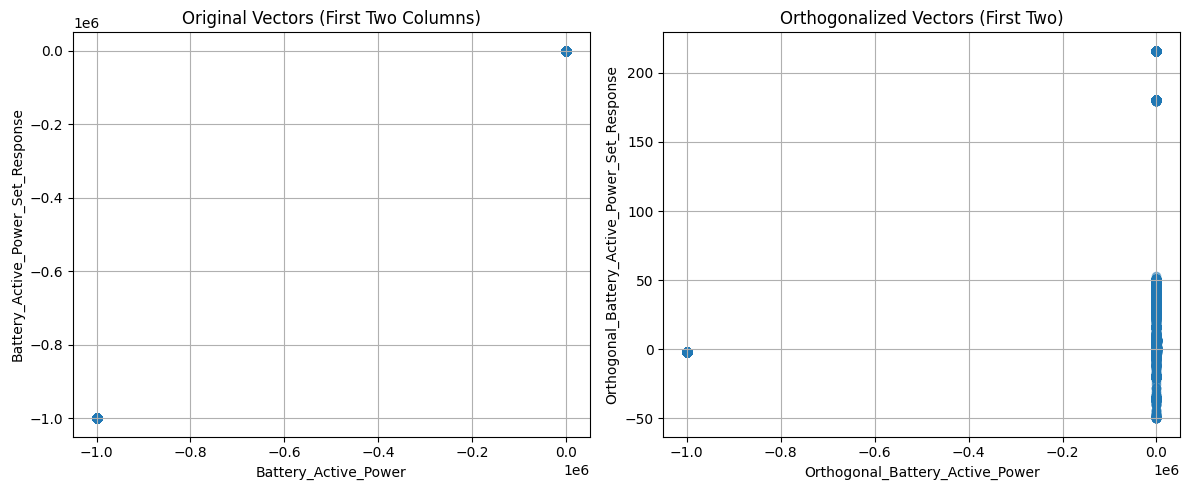

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming powerdataset is your original DataFrame and power is the list of orthogonalized vectors

# Convert the list of orthogonalized vectors back to a DataFrame for easier plotting
# Note: This assumes all orthogonal vectors have the same length as the original columns
orthogonal_power_df = pd.DataFrame(np.array(power).T, columns=[f'Orthogonal_{col}' for col in powerdataset.columns])

# Plotting the first two original vectors
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(powerdataset.iloc[:, 0], powerdataset.iloc[:, 1], alpha=0.5)
plt.title('Original Vectors (First Two Columns)')
plt.xlabel(powerdataset.columns[0])
plt.ylabel(powerdataset.columns[1])
plt.grid(True)

# Plotting the first two orthogonalized vectors
plt.subplot(1, 2, 2)
plt.scatter(orthogonal_power_df.iloc[:, 0], orthogonal_power_df.iloc[:, 1], alpha=0.5)
plt.title('Orthogonalized Vectors (First Two)')
plt.xlabel(orthogonal_power_df.columns[0])
plt.ylabel(orthogonal_power_df.columns[1])
plt.grid(True)

plt.tight_layout()
plt.show()

# You can similarly visualize other pairs of vectors or use different plot types like line plots
# if visualizing the time series aspect is important.

# Orthogonal complement

In [47]:
# if new vector is othogonal to all vectors in signal subspace then it noise

def orth_com(v, signal, tolerance=1e-9):
  """
  Checks if a vector v is orthogonal to all vectors in the signal subspace.

  Args:
    v: The vector to check (numpy array).
    signal: A list of numpy arrays representing the basis vectors of the signal subspace.
    tolerance: A small value to account for floating-point inaccuracies when checking for zero dot product.

  Returns:
    True if the vector is orthogonal to all vectors in the signal subspace (is in the orthogonal complement),
    False otherwise.
  """
  for vector in signal:
    # Check if the absolute value of the dot product is greater than the tolerance
    if abs(np.dot(v, vector)) > tolerance:
      # If the dot product is not close to zero for any vector in the signal,
      # then v is not orthogonal to the signal subspace.
      print("vector is signal")
      return False

  # If the dot product was close to zero for all vectors in the signal,
  # then v is orthogonal to the signal subspace.
  print("vector is noise")
  return True

# ML model

Take a vector and discern if its signal or noise.
determin what type of noise it it